Silhouette Scores for Hierarchical Clustering:
Number of Clusters: 4, Silhouette Score: 0.3921
Number of Clusters: 5, Silhouette Score: 0.3734
Number of Clusters: 6, Silhouette Score: 0.3618
Number of Clusters: 7, Silhouette Score: 0.3638
Number of Clusters: 8, Silhouette Score: 0.3568
Number of Clusters: 9, Silhouette Score: 0.3373
Number of Clusters: 10, Silhouette Score: 0.3434


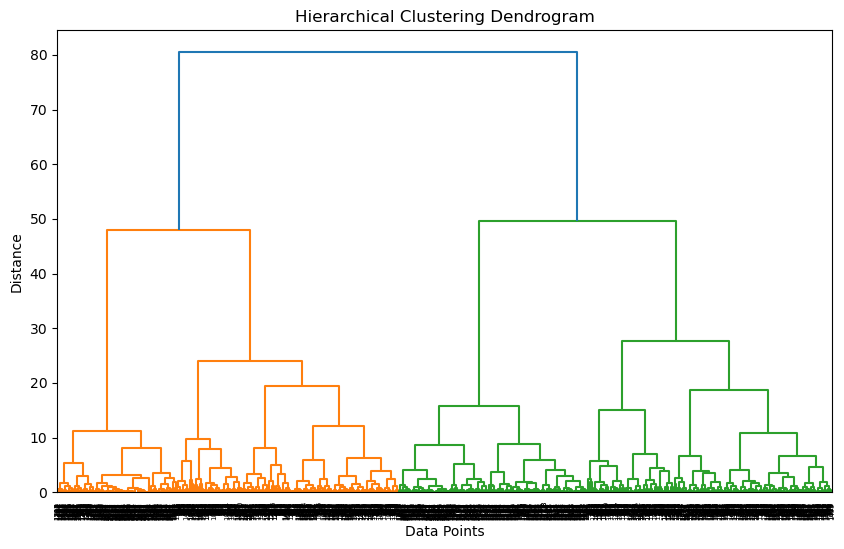

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

# Step 4: Reduce the data to 2D using PCA (optional, for visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Step 5: Perform Hierarchical Clustering for k=4 to k=10 and calculate Silhouette Scores
k_values = range(4, 11)
silhouette_scores = {}

for k in k_values:
    hierarchical_model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical_model.fit_predict(reduced_data)
    silhouette_scores[k] = silhouette_score(reduced_data, labels)

# Step 6: Display the Silhouette Scores
print("Silhouette Scores for Hierarchical Clustering:")
for k, score in silhouette_scores.items():
    print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")

# Step 7: Plot the dendrogram (optional, for visualization)
linkage_matrix = linkage(reduced_data, method='ward')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=["Broad_Class", "Broad_Class_Encoded"], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Perform Hierarchical Clustering for a range of k values (4 to 10)
k_values = range(4, 11)
silhouette_scores_hierarchical_minmax = {}

for k in k_values:
    hierarchical_model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical_model.fit_predict(minmax_normalized_data)
    silhouette_scores_hierarchical_minmax[k] = silhouette_score(minmax_normalized_data, labels)

# Step 5: Display the Silhouette Scores
silhouette_scores_hierarchical_minmax_df = pd.DataFrame(
    list(silhouette_scores_hierarchical_minmax.items()), 
    columns=["Number of Clusters", "Silhouette Score"]
)

print("Silhouette Scores for Hierarchical Clustering with Min-Max Normalization:")
print(silhouette_scores_hierarchical_minmax_df)


Silhouette Scores for Hierarchical Clustering with Min-Max Normalization:
   Number of Clusters  Silhouette Score
0                   4          0.268326
1                   5          0.288008
2                   6          0.189735
3                   7          0.203038
4                   8          0.212537
5                   9          0.222908
6                  10          0.223812
